# Import libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import polynomial_regression as polynomial

In [2]:
df = pd.read_csv('full_df_testing.csv') # load the dataset we created

In [3]:
df.head()

,Unnamed: 0,State,Number of fires,Number of acres burned,Year,Out,In,GDP,index_sa
0,0,Alaska,688.0,1129421.0,2010,94848.0,1961604.0,52947.7,218.6700
1,1,Alabama,2357.0,26331.0,2010,99850.0,5871042.0,175470.1,179.9575
2,2,Arkansas,2010.0,30954.0,2010,64264.0,4272858.0,100970.8,178.0375
3,3,Arizona,1517.0,74445.0,2010,177056.0,12027150.0,248125.3,182.4725
4,4,California,6502.0,108742.0,2010,575165.0,24016446.0,1973511.9,163.6975


# Start with a heatmap

/var/folders/8_/hfsq0_h56x973ykrw2_dp5nw0000gn/T/ipykernel_29623/3930345361.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

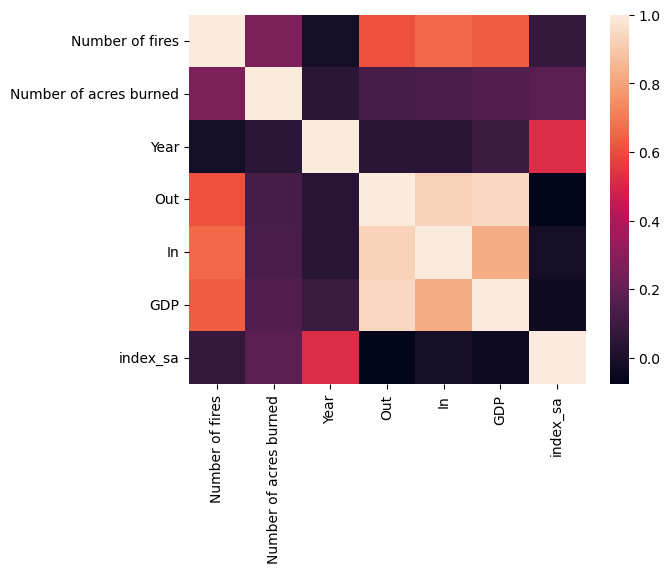

In [4]:
df = df[['State', 'Number of fires', 'Number of acres burned', 'Year', 'Out', 'In', 'GDP', 'index_sa']]
df_corr = df.corr()
sns.heatmap(df_corr)

# Filter by state:
## We want California, Florida, Texas, and Ohio

In [5]:
ca_df = df.loc[df['State'] == 'California']
ca_df.head()

,State,Number of fires,Number of acres burned,Year,Out,In,GDP,index_sa
4,California,6502.0,108742.0,2010,575165.0,24016446.0,1973511.9,163.6975
54,California,7989.0,126854.0,2011,562550.0,25295112.0,2049336.8,152.8875
104,California,9907.0,577675.0,2013,582392.0,26215758.0,2261510.6,190.4525
154,California,7865.0,555044.0,2014,593860.0,27754272.0,2399077.7,209.6375
204,California,8745.0,893362.0,2015,643886.0,27781758.0,2559643.2,224.5075


In [6]:
fl_df = df.loc[df['State'] == 'Florida']
fl_df.head()

,State,Number of fires,Number of acres burned,Year,Out,In,GDP,index_sa
8,Florida,2334.0,37929.0,2010,439115.0,26076006.0,738242.3,177.1900
58,Florida,5102.0,299991.0,2011,443816.0,26924238.0,746535.3,166.7925
108,Florida,101.0,7660.0,2013,430233.0,28587924.0,800886.0,197.8850
158,Florida,2436.0,101599.0,2014,441815.0,29511054.0,840386.4,213.5500
208,Florida,2422.0,73432.0,2015,450835.0,31586652.0,897754.7,233.1700


In [7]:
tx_df = df.loc[df['State'] == 'Texas']
tx_df.head()

,State,Number of fires,Number of acres burned,Year,Out,In,GDP,index_sa
42,Texas,6691.0,203891.0,2010,412618.0,26274132.0,1237304.0,186.0900
92,Texas,3470.0,2722623.0,2011,405283.0,27795204.0,1331138.4,183.7750
142,Texas,70.0,10743.0,2013,411170.0,29593836.0,1500554.3,203.7250
192,Texas,9677.0,131138.0,2014,436362.0,29082888.0,1568070.8,217.7625
242,Texas,9272.0,184418.0,2015,445925.0,29863728.0,1564374.3,232.6450


In [8]:
oh_df = df.loc[df['State'] == 'Ohio']
oh_df.head()

,State,Number of fires,Number of acres burned,Year,Out,In,GDP,index_sa
34,Ohio,557.0,3995.0,2010,188082.0,9322182.0,496457.7,152.1625
84,Ohio,246.0,1203.0,2011,206049.0,10356012.0,523355.0,145.9575
134,Ohio,31.0,152.0,2013,201829.0,10030446.0,560936.8,154.1100
184,Ohio,63.0,684.0,2014,207327.0,10624068.0,592876.2,160.1400
234,Ohio,69.0,548.0,2015,214018.0,10987650.0,609321.7,166.1650


In [9]:
ny_df = df.loc[df['State'] == 'New York']

# Analyze CA data

slope= [0.10924334]
intercept= [346110.62640651]
R^2= 0.8482630918658144


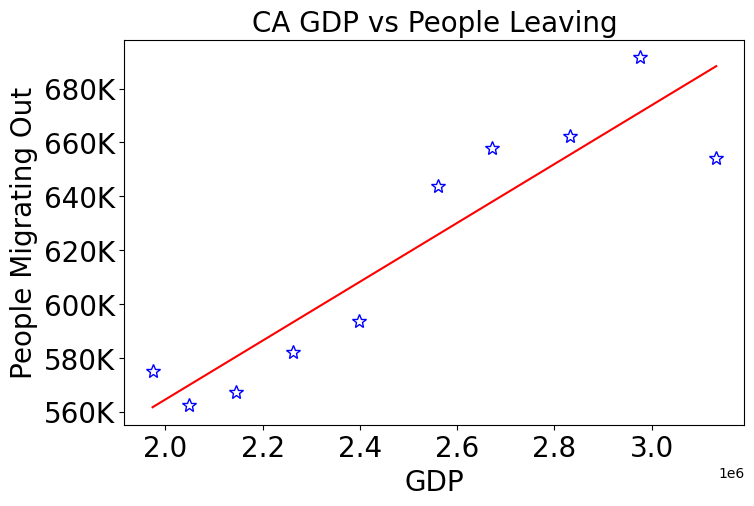

In [10]:
# plot a linear regression for preliminary analysis

ca_reg = LinearRegression()
x = np.array(ca_df['GDP']).reshape(-1, 1)
y = np.array(ca_df['Out']).reshape(-1, 1)
ca_reg.fit(x, y) 
print("slope=", ca_reg.coef_[0])
print("intercept=", ca_reg.intercept_)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(ca_df['GDP'], ca_df['Out'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",ca_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)

ax.plot(x_test, ca_reg.coef_[0]*x_test+ca_reg.intercept_,c='r', label="Model")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.xlabel('GDP', fontsize = 20)
plt.ylabel('People Migrating Out', fontsize = 20)
plt.title('CA GDP vs People Leaving', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

slope= [1.74521525]
intercept= [22312674.27767629]
R^2= 0.2744821109032687


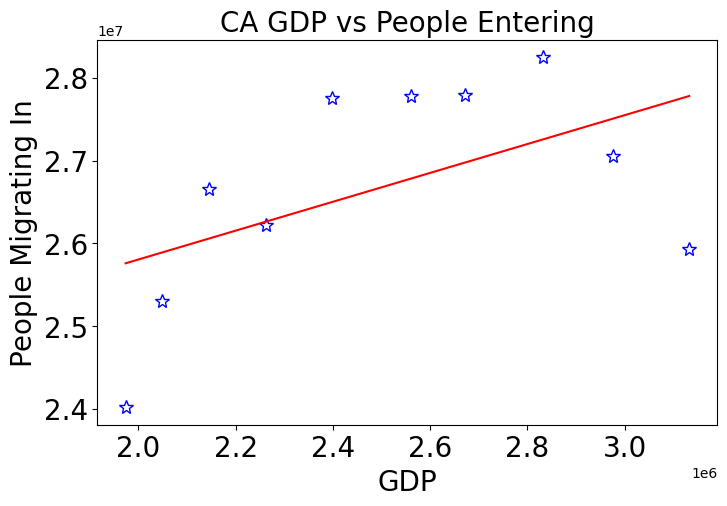

In [11]:
ca_reg = LinearRegression()
x = np.array(ca_df['GDP']).reshape(-1, 1)
y = np.array(ca_df['In']).reshape(-1, 1)
ca_reg.fit(x, y) 
print("slope=", ca_reg.coef_[0])
print("intercept=", ca_reg.intercept_)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(ca_df['GDP'], ca_df['In'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",ca_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)

ax.plot(x_test, ca_reg.coef_[0]*x_test+ca_reg.intercept_,c='r', label="Model")

plt.xlabel('GDP', fontsize = 20)
plt.ylabel('People Migrating In', fontsize = 20)
plt.title('CA GDP vs People Entering', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

**This might be better as a quadratic**

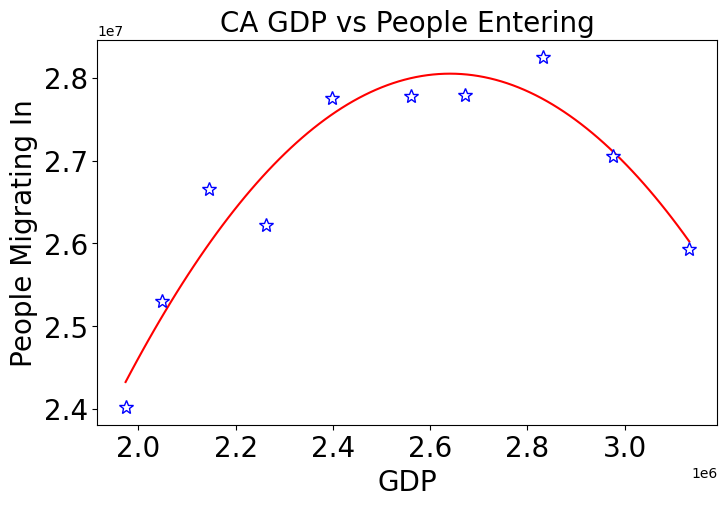

In [12]:
model = polynomial.fit_polynomial_curve(ca_df['GDP'], ca_df['In'], 2, 'GDP', 'People Migrating In', 'CA GDP vs People Entering')

slope= [0.15367318]
intercept= [199836.17397872]
R^2= 0.7627935095811715


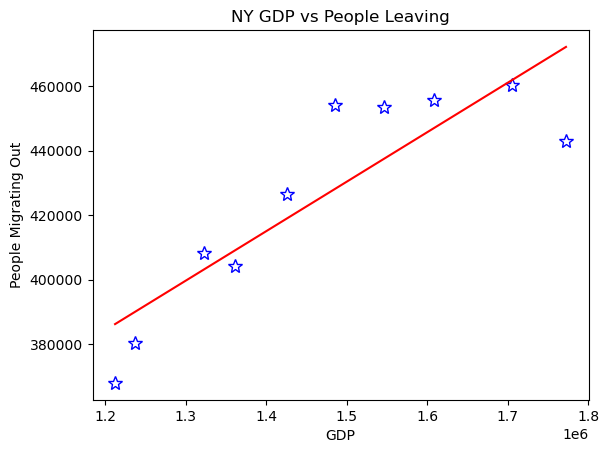

MSE: 26389317081.342716


In [13]:
ny_reg = LinearRegression()
x = np.array(ny_df['GDP']).reshape(-1, 1)
y = np.array(ny_df['Out']).reshape(-1, 1)
ny_reg.fit(x, y) 
print("slope=", ny_reg.coef_[0])
print("intercept=", ny_reg.intercept_)

plt.plot(ny_df['GDP'], ny_df['Out'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",ny_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)
plt.plot(x_test, ny_reg.coef_[0]*x_test+ny_reg.intercept_,c='r', label="Model")
plt.xlabel('GDP')
plt.ylabel('People Migrating Out')
plt.title('NY GDP vs People Leaving')
plt.show()

print(f"MSE: {mean_squared_error(y, ny_reg.predict(y))}")

slope= [-1.57009824]
intercept= [16696578.55969438]
R^2= 0.24987807175961374


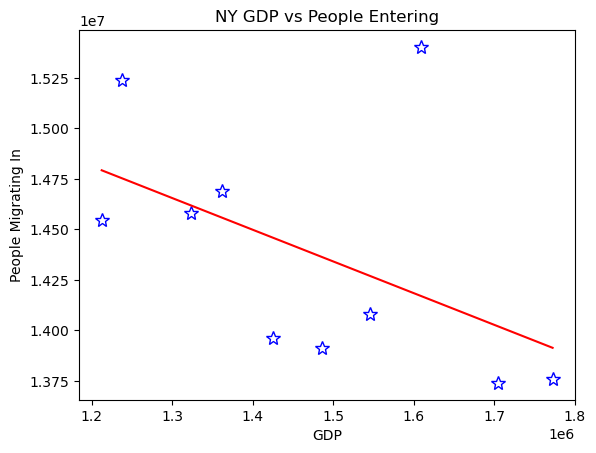

MSE: 413898958531523.5


In [14]:
ny_reg = LinearRegression()
x = np.array(ny_df['GDP']).reshape(-1, 1)
y = np.array(ny_df['In']).reshape(-1, 1)
ny_reg.fit(x, y) 
print("slope=", ny_reg.coef_[0])
print("intercept=", ny_reg.intercept_)

plt.plot(ny_df['GDP'], ny_df['In'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",ny_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)
plt.plot(x_test, ny_reg.coef_[0]*x_test+ny_reg.intercept_,c='r', label="Model")
plt.xlabel('GDP')
plt.ylabel('People Migrating In')
plt.title('NY GDP vs People Entering')
plt.show()
print(f"MSE: {mean_squared_error(y, ny_reg.predict(y))}")

# Analyze FL data

slope= [0.09225773]
intercept= [365110.55536303]
R^2= 0.6553489439810254


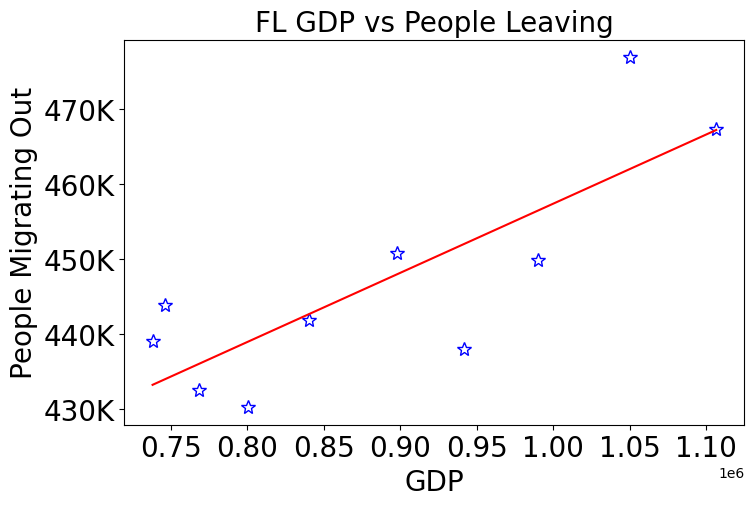

In [15]:
fl_reg = LinearRegression()
x = np.array(fl_df['GDP']).reshape(-1, 1)
y = np.array(fl_df['Out']).reshape(-1, 1)
fl_reg.fit(x, y) 
print("slope=", fl_reg.coef_[0])
print("intercept=", fl_reg.intercept_)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(fl_df['GDP'], fl_df['Out'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",fl_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)

ax.plot(x_test, fl_reg.coef_[0]*x_test+fl_reg.intercept_,c='r', label="Model")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.xlabel('GDP', fontsize = 20)
plt.ylabel('People Migrating Out', fontsize = 20)
plt.title('FL GDP vs People Leaving', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

# print(f"MSE: {mean_squared_error(y, fl_reg.predict(y))}")

slope= [15.11573953]
intercept= [16490899.05554381]
R^2= 0.7466700295628779


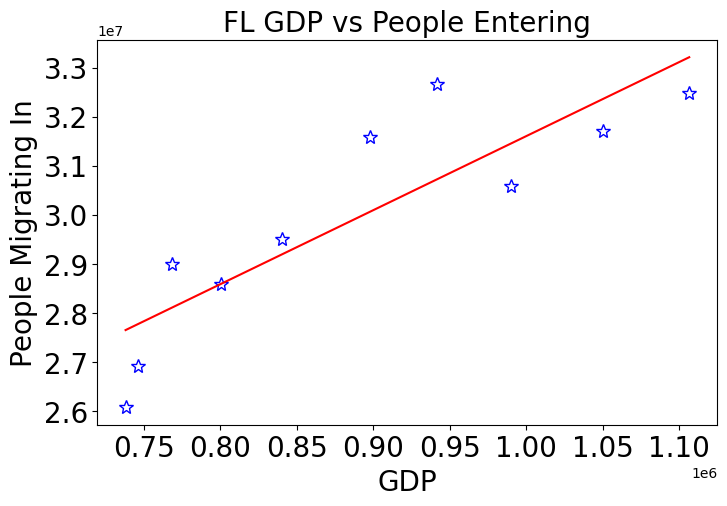

In [16]:
fl_reg = LinearRegression()
x = np.array(fl_df['GDP']).reshape(-1, 1)
y = np.array(fl_df['In']).reshape(-1, 1)
fl_reg.fit(x, y) 
print("slope=", fl_reg.coef_[0])
print("intercept=", fl_reg.intercept_)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(fl_df['GDP'], fl_df['In'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",fl_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)

ax.plot(x_test, fl_reg.coef_[0]*x_test+fl_reg.intercept_,c='r', label="Model")
plt.xlabel('GDP', fontsize = 20)
plt.ylabel('People Migrating In', fontsize = 20)
plt.title('FL GDP vs People Entering', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()
# print(f"MSE: {mean_squared_error(y, fl_reg.predict(y))}")

# Analyze TX data

slope= [0.11031937]
intercept= [263795.00435992]
R^2= 0.7155338235250536


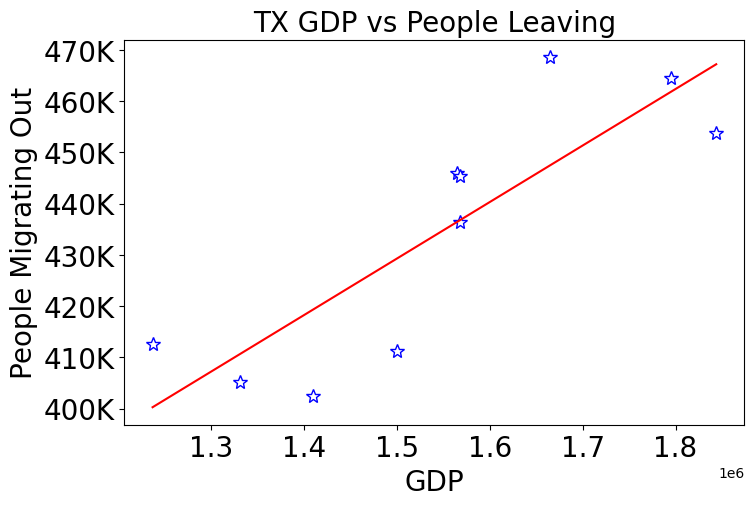

In [17]:
tx_reg = LinearRegression()
x = np.array(tx_df['GDP']).reshape(-1, 1)
y = np.array(tx_df['Out']).reshape(-1, 1)
tx_reg.fit(x, y) 
print("slope=", tx_reg.coef_[0])
print("intercept=", tx_reg.intercept_)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(tx_df['GDP'], tx_df['Out'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",tx_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)

ax.plot(x_test, tx_reg.coef_[0]*x_test+tx_reg.intercept_,c='r', label="Model")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.xlabel('GDP', fontsize = 20)
plt.ylabel('People Migrating Out', fontsize = 20)
plt.title('TX GDP vs People Leaving', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

# print(f"MSE: {mean_squared_error(y, ny_reg.predict(y))}")

slope= [5.94016834]
intercept= [19577430.29553206]
R^2= 0.7188717663914561


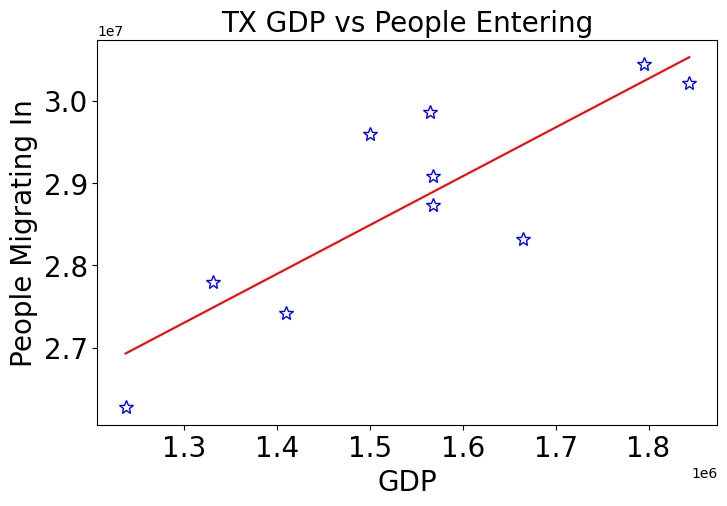

In [18]:
tx_reg = LinearRegression()
x = np.array(tx_df['GDP']).reshape(-1, 1)
y = np.array(tx_df['In']).reshape(-1, 1)
tx_reg.fit(x, y) 
print("slope=", tx_reg.coef_[0])
print("intercept=", tx_reg.intercept_)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(tx_df['GDP'], tx_df['In'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",tx_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)

ax.plot(x_test, tx_reg.coef_[0]*x_test+tx_reg.intercept_,c='r', label="Model")

# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.xlabel('GDP', fontsize = 20)
plt.ylabel('People Migrating In', fontsize = 20)
plt.title('TX GDP vs People Entering', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

# print(f"MSE: {mean_squared_error(y, ny_reg.predict(y))}")

# Analyze OH data

slope= [15.11573953]
intercept= [16490899.05554381]
R^2= 0.7466700295628779


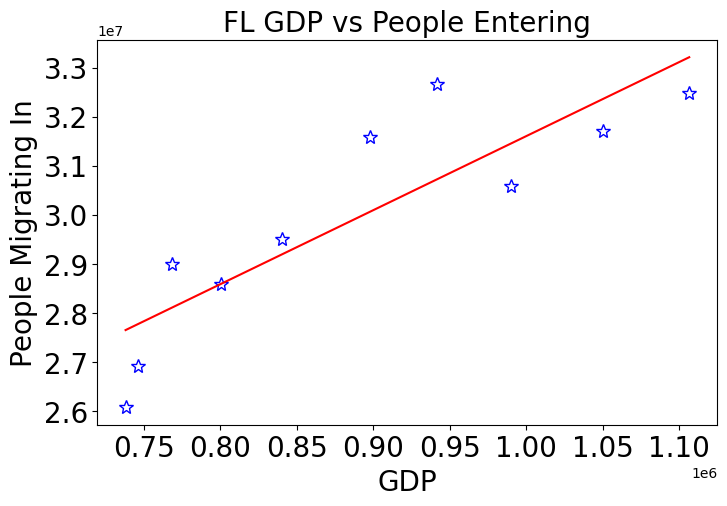

In [19]:
fl_reg = LinearRegression()
x = np.array(fl_df['GDP']).reshape(-1, 1)
y = np.array(fl_df['In']).reshape(-1, 1)
fl_reg.fit(x, y) 
print("slope=", fl_reg.coef_[0])
print("intercept=", fl_reg.intercept_)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(fl_df['GDP'], fl_df['In'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",fl_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)

ax.plot(x_test, fl_reg.coef_[0]*x_test+fl_reg.intercept_,c='r', label="Model")

plt.xlabel('GDP', fontsize = 20)
plt.ylabel('People Migrating In', fontsize = 20)
plt.title('FL GDP vs People Entering', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

slope= [0.03789732]
intercept= [181147.03864648]
R^2= 0.0937670663772785


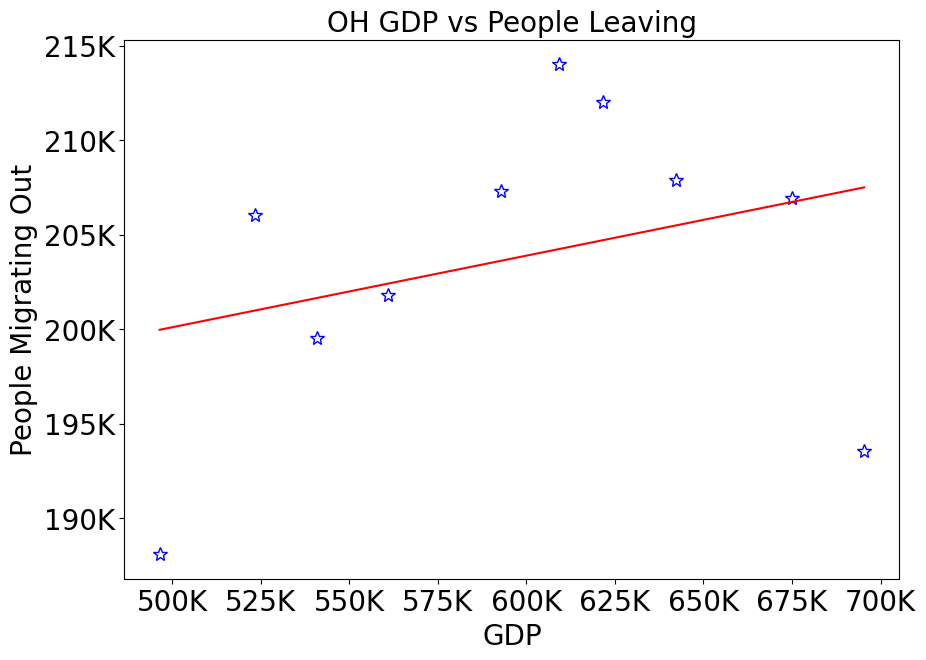

In [20]:
oh_reg = LinearRegression()
x = np.array(oh_df['GDP']).reshape(-1, 1)
y = np.array(oh_df['Out']).reshape(-1, 1)
oh_reg.fit(x, y) 
print("slope=", oh_reg.coef_[0])
print("intercept=", oh_reg.intercept_)

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(oh_df['GDP'], oh_df['Out'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",oh_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)
ax.plot(x_test, oh_reg.coef_[0]*x_test+oh_reg.intercept_,c='r', label="Model")

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.xlabel('GDP', fontsize = 20)
plt.ylabel('People Migrating Out', fontsize = 20)
plt.title('OH GDP vs People Leaving', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# print(f"MSE: {mean_squared_error(y, ny_reg.predict(y))}")

slope= [6.01278945]
intercept= [6918680.24027521]
R^2= 0.5930907701441122


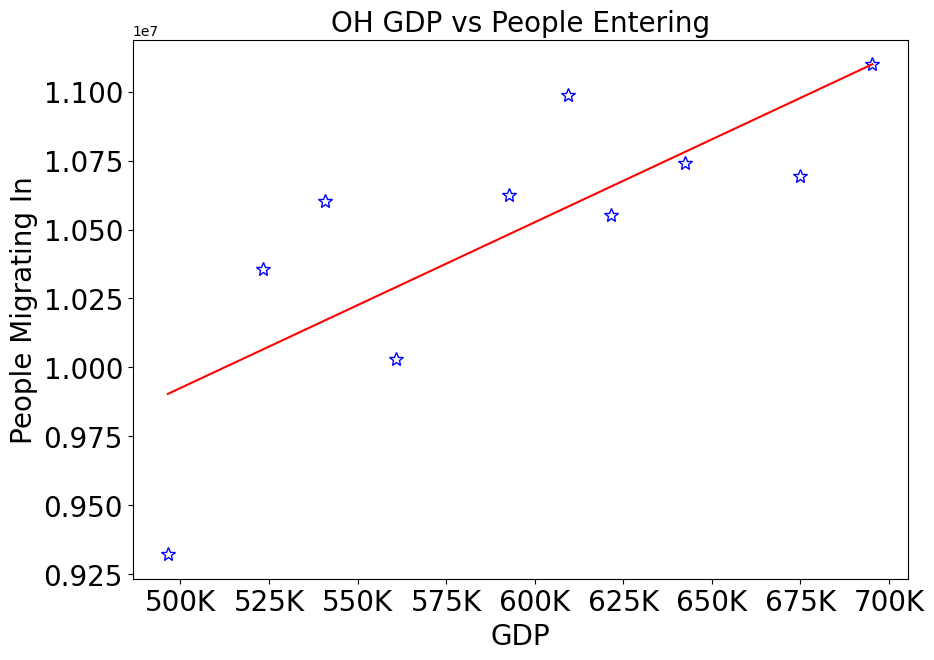

In [21]:
oh_reg = LinearRegression()
x = np.array(oh_df['GDP']).reshape(-1, 1)
y = np.array(oh_df['In']).reshape(-1, 1)
oh_reg.fit(x, y) 
print("slope=", oh_reg.coef_[0])
print("intercept=", oh_reg.intercept_)

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(oh_df['GDP'], oh_df['In'], 'b*', mec='b', mfc='w', ms=10, label='Original Data')
print("R^2=",oh_reg.score(x,y))
x_test = np.linspace(x.min(), x.max(), 100)
ax.plot(x_test, oh_reg.coef_[0]*x_test+oh_reg.intercept_,c='r', label="Model")

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.xlabel('GDP', fontsize = 20)
plt.ylabel('People Migrating In', fontsize = 20)
plt.title('OH GDP vs People Entering', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# print(f"MSE: {mean_squared_error(y, ny_reg.predict(y))}")